In [5]:
import  numpy as  np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib
import matplotlib.pyplot as plt

# 解决中文显示，用全局设置
plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # mac电脑用这个
# 负号显示
plt.rcParams['axes.unicode_minus'] = False

# 可以在notebook 使用 魔法命令，更改画图的方式，如 矢量图
%config InlineBackend.figure_format = 'svg'

from pyecharts.charts import *
from pyecharts import options as opts

## 读取数据

In [6]:
data=pd.read_csv('tianmao1.csv')
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8
...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaN,0.0
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaN,0.0
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0


In [7]:
#数据详情
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   订单编号      28010 non-null  int64  
 1   总金额       28010 non-null  float64
 2   买家实际支付金额  28010 non-null  float64
 3   收货地址      28010 non-null  object 
 4   订单创建时间    28010 non-null  object 
 5   订单付款时间    24087 non-null  object 
 6   退款金额      28010 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ MB


## 字段说明

1.订单编号：订单编号  
2.总金额：订单总金额  
3.买家实际支付金额：总金额 - 退款金额（在已付款的情况下）。金额为0（在未付款的情况下）  
4.收货地址：各个省份  
5.订单创建时间：下单时间  
6.订单付款时间：付款时间  
7.退款金额：付款后申请退款的金额。如无付过款，退款金额为0  

## 数据清洗

In [8]:
#查询书是否有重复
data.duplicated().sum()

0

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
#查询数据条数
data.shape

(28010, 7)

In [11]:
#重置索引
data.reset_index(drop=True , inplace=True)

In [12]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaN,0.0
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaN,0.0
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8
...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaN,0.0
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaN,0.0
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0


In [13]:
#查询字段
data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址 ', '订单创建时间', '订单付款时间 ', '退款金额'], dtype='object')

In [14]:
#将字段名称中空格去掉，规范字段名称
data = data.rename( columns = {'收货地址 ':'收货地址','订单付款时间 ':'订单付款时间'} )
data.columns

Index(['订单编号', '总金额', '买家实际支付金额', '收货地址', '订单创建时间', '订单付款时间', '退款金额'], dtype='object')

In [15]:
#修改日期格式
data['订单创建时间']=pd.to_datetime(data['订单创建时间'])
data['订单付款时间']=pd.to_datetime(data['订单付款时间'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   订单编号      28010 non-null  int64         
 1   总金额       28010 non-null  float64       
 2   买家实际支付金额  28010 non-null  float64       
 3   收货地址      28010 non-null  object        
 4   订单创建时间    28010 non-null  datetime64[ns]
 5   订单付款时间    24087 non-null  datetime64[ns]
 6   退款金额      28010 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [16]:
#查询是否有缺失值
data.isna().sum()
#此缺失值为创建订单  但是未付款，属于正常情况，故对此缺失值不做处理

订单编号           0
总金额            0
买家实际支付金额       0
收货地址           0
订单创建时间         0
订单付款时间      3923
退款金额           0
dtype: int64

In [17]:
#添加付款日期列
data['付款日期'] = data['订单付款时间'].dt.strftime('%Y-%m-%d')

In [18]:
#订单创建时间列
data['订单创建日期'] = data['订单创建时间'].dt.strftime('%Y-%m-%d')

In [19]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,付款日期,订单创建日期
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,NaN,2020-02-21
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,2020-02-21,2020-02-20
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,NaN,2020-02-20
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,2020-02-20,2020-02-20
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,2020-02-20,2020-02-20
...,...,...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0,2020-02-27,2020-02-27
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaT,0.0,NaN,2020-02-27
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaT,0.0,NaN,2020-02-27
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0,2020-02-27,2020-02-27


In [20]:
#保存
data.to_csv('清洗后的数据.csv',index=False)

## 数据分析

In [21]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,付款日期,订单创建日期
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,NaN,2020-02-21
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,2020-02-21,2020-02-20
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,NaN,2020-02-20
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,2020-02-20,2020-02-20
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,2020-02-20,2020-02-20
...,...,...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0,2020-02-27,2020-02-27
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaT,0.0,NaN,2020-02-27
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaT,0.0,NaN,2020-02-27
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0,2020-02-27,2020-02-27


## 2月每日销售额分析

In [22]:
#当月销售总金额
data['买家实际支付金额'].sum()

1902487.15

In [23]:
#每日销售金额
data1=data.groupby(data['付款日期']).sum().drop(['总金额','退款金额'],axis=1).reset_index()
data1

TypeError: datetime64 type does not support sum operations

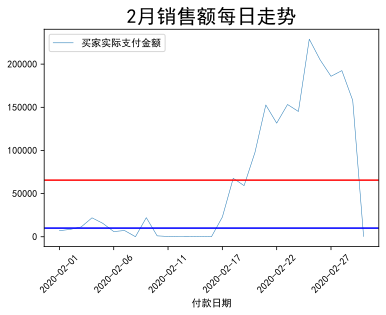

In [20]:
data1.plot(x='付款日期',y='买家实际支付金额',lw=0.5,fontsize=10)
plt.title('2月销售额每日走势',fontsize=20)
plt.xticks(rotation=45)
plt.axhline( data1.买家实际支付金额.mean(),color='red' )
plt.axhline( 10000,color='blue' )
plt.show()

红色线：平均销售额
蓝色线：1w销售额
根据上图可以看出：

整体的销售额为190万  
4号，9号出现局部峰值，5-8号持续型下降，每日成交额低于万级水平  
10-16日共一周时间的销售额几乎低于千级，16日甚至没有销售额，17号开始回升    
2月上半个月，企业多数未复工，快递停运，无法发货，导致销售额低迷  
17日后出现持续型增长，25日出现本月峰值  
下半个月，随着企业复工逐渐增多，销售额开始上涨，满足年内的购物需求  

## 每单平均单价

In [21]:
data['买家实际支付金额'].sum()/len(data)

67.92171188861121

## 转换率

In [22]:
#订单创建数
a=len(data)
e=round(len(data)/len(data)*100,2)
a,e

(28010, 100.0)

In [23]:
#订单成交数
b=len(data[data['订单付款时间'].notnull()])
f=round(len(data[data['订单付款时间'].notnull()])*100/len(data),2)
b,f

(24087, 85.99)

In [24]:
#实际付款数
c=len(data[data['买家实际支付金额']!=0])
g=round(len(data[data['买家实际支付金额']!=0])/len(data)*100,2)
c,g

(18955, 67.67)

In [25]:
#全额付款订单数
d=len(data[data['退款金额']==0])-(len(data)-len(data[data['订单付款时间'].notnull()]))
h=round((len(data[data['退款金额']==0])-(len(data)-len(data[data['订单付款时间'].notnull()])))/len(data)*100,2)
d,h

(18441, 65.84)

In [26]:
dict1={'订单创建数':a,
       '订单成交数':b,
       '实际付款数':c,
       '全额付款订单数':d}
dict1

{'订单创建数': 28010, '订单成交数': 24087, '实际付款数': 18955, '全额付款订单数': 18441}

In [27]:
data_dingdanshu=pd.Series(dict1,name = '订单数').to_frame()
data_dingdanshu

,订单数
订单创建数,28010
订单成交数,24087
实际付款数,18955
全额付款订单数,18441


In [28]:
dict2={'订单创建数':e,
       '订单成交数':f,
       '实际付款数':g,
       '全额付款订单数':h}
dict2

{'订单创建数': 100.0, '订单成交数': 85.99, '实际付款数': 67.67, '全额付款订单数': 65.84}

In [29]:
data_zhuanhuanlv=pd.Series(dict2,name = '转换率').to_frame()
data_zhuanhuanlv

,转换率
订单创建数,100.00
订单成交数,85.99
实际付款数,67.67
全额付款订单数,65.84


In [30]:
pd.concat( [data_dingdanshu,data_zhuanhuanlv],axis=1)

,订单数,转换率
订单创建数,28010,100.00
订单成交数,24087,85.99
实际付款数,18955,67.67
全额付款订单数,18441,65.84


In [31]:
#准备数据
x = ["订单创建数", "订单成交数", "实际付款数", "全额付款订单数",]
A = [e,f,g,h]

In [32]:
myinit = opts.InitOpts(
        width='600px',
        height='350px'
)

In [33]:
funnel = Funnel(init_opts=myinit)

funnel.add('',list(zip(x,A)),
          sort_ = 'descending',
           is_selected=True
          )


funnel.render_notebook()

根据上图可以看出：

总订单数为28008单  
其中24086单为成交订单，18954单为买家实际付款，18440单位全额无退单订单数
对应的转换率为 86%，67.67%，65.84%  
可能的原因是有顾客冲动消费，冷静思考后放弃购买  
或者是寻找到其他更便宜的店家从而放弃购买  
又或者是商家货源不足，从而导致订单流失  

## 订单地区分析

In [34]:
dizhi=data.groupby('收货地址')['总金额'].count().reset_index().\
rename(columns={'总金额':'订单数量'}).sort_values('订单数量').reset_index(drop=True)
dizhi

,收货地址,订单数量
0,西藏自治区,3
1,青海省,19
2,宁夏回族自治区,42
3,新疆维吾尔自治区,58
4,湖北省,75
5,甘肃省,167
6,海南省,178
7,内蒙古自治区,215
8,贵州省,345
9,黑龙江省,379


In [35]:
x=list(dizhi.收货地址)
y=list(dizhi.订单数量)

In [36]:
bar = Bar()

bar.add_xaxis(x)
bar.add_yaxis(
    '订单数量',
    y)
   
bar.render_notebook()

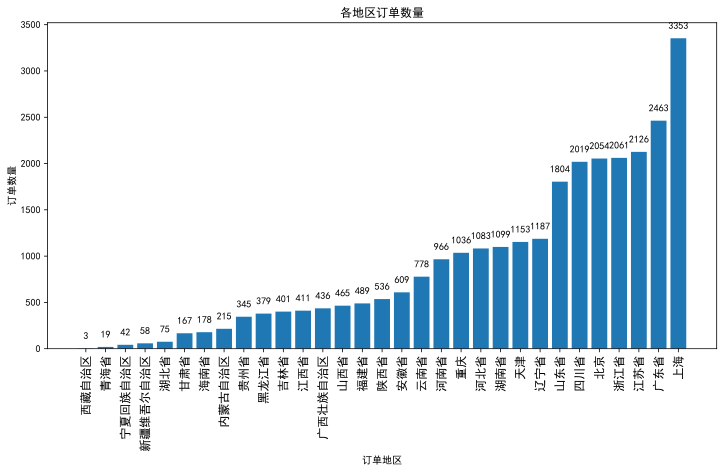

In [37]:
plt.figure(figsize=(12,6))
plt.ylabel('订单数量')
plt.xlabel('订单地区')
plt.title('各地区订单数量')
plt.bar(dizhi['收货地址'],dizhi['订单数量'])
plt.xticks(rotation=90,fontsize=12)
for x,y in enumerate(dizhi['订单数量']):
    plt.text(x,y+100,y,ha='center')

plt.show()

上海的订单数量是最多的,其次就是广东，而西藏、青海、宁夏等地区订单数量最少

## 日创建订单

In [38]:
data

,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,付款日期,订单创建日期
0,1,178.8,0.0,上海,2020-02-21 00:00:00,NaT,0.0,NaN,2020-02-21
1,2,21.0,21.0,内蒙古自治区,2020-02-20 23:59:54,2020-02-21 00:00:02,0.0,2020-02-21,2020-02-20
2,3,37.0,0.0,安徽省,2020-02-20 23:59:35,NaT,0.0,NaN,2020-02-20
3,4,157.0,157.0,湖南省,2020-02-20 23:58:34,2020-02-20 23:58:44,0.0,2020-02-20,2020-02-20
4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,2020-02-20,2020-02-20
...,...,...,...,...,...,...,...,...,...
28005,28006,37.0,37.0,四川省,2020-02-27 00:01:00,2020-02-27 00:01:10,0.0,2020-02-27,2020-02-27
28006,28007,69.0,0.0,上海,2020-02-27 00:00:18,NaT,0.0,NaN,2020-02-27
28007,28008,69.0,0.0,上海,2020-02-27 00:00:17,NaT,0.0,NaN,2020-02-27
28008,28009,37.0,37.0,辽宁省,2020-02-27 00:00:09,2020-02-27 00:00:17,0.0,2020-02-27,2020-02-27


In [39]:
date=data.groupby(data['订单创建日期'])['总金额'].count().reset_index().rename(columns={'总金额':'订单数量'}).sort_values('订单创建日期').reset_index(drop=True)
date

,订单创建日期,订单数量
0,2020-02-01,176
1,2020-02-02,222
2,2020-02-03,267
3,2020-02-04,469
4,2020-02-05,369
5,2020-02-06,144
6,2020-02-07,177
7,2020-02-09,404
8,2020-02-10,27
9,2020-02-11,15


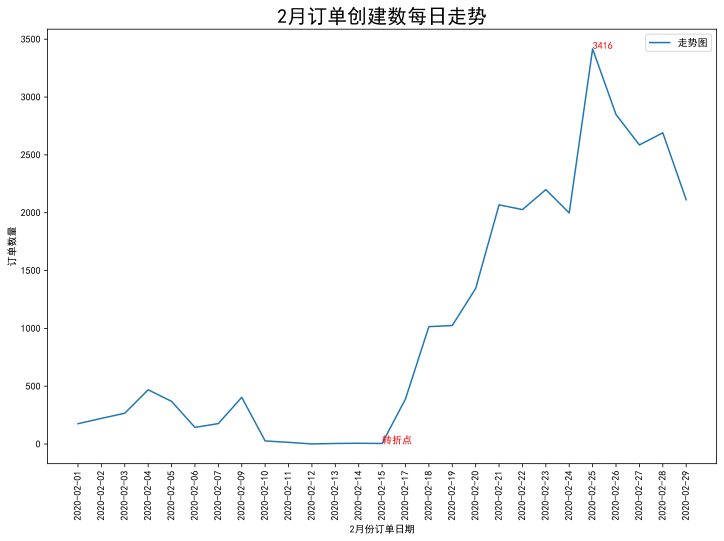

In [40]:
#作图
plt.figure(figsize=(12,8))
plt.plot(date['订单创建日期'],date['订单数量'],label='走势图')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('2月份订单日期')
plt.ylabel('订单数量')
plt.title('2月订单创建数每日走势',fontsize=20)
plt.text('2020-02-15',5,'转折点' ,color='red')
plt.text('2020-02-25',3416,'3416' ,color='red')
plt.show()

15号为订单的转折点，15号以前，订单数量最多不过500单，可能因为刚过完年，没有购物需求，15号开始 订单数量呈现大幅度上升趋势，并在25号达到本月巅峰为3416单

## 各地区退款数据分析

In [41]:
data2=data[data['退款金额']!=0].reset_index()
data2

,index,订单编号,总金额,买家实际支付金额,收货地址,订单创建时间,订单付款时间,退款金额,付款日期,订单创建日期
0,4,5,64.8,0.0,江苏省,2020-02-20 23:57:04,2020-02-20 23:57:11,64.8,2020-02-20,2020-02-20
1,5,6,327.7,148.9,浙江省,2020-02-20 23:56:39,2020-02-20 23:56:53,178.8,2020-02-20,2020-02-20
2,8,9,43.0,0.0,湖南省,2020-02-20 23:54:53,2020-02-20 23:55:04,43.0,2020-02-20,2020-02-20
3,10,11,267.9,0.0,北京,2020-02-20 23:54:24,2020-02-20 23:54:31,267.9,2020-02-20,2020-02-20
4,22,23,21.0,0.0,广西壮族自治区,2020-02-20 23:49:58,2020-02-20 23:50:00,21.0,2020-02-20,2020-02-20
...,...,...,...,...,...,...,...,...,...,...
5641,27987,27988,232.0,0.0,河南省,2020-02-27 00:11:25,2020-02-27 00:11:30,232.0,2020-02-27,2020-02-27
5642,27988,27989,45.0,5.0,山东省,2020-02-27 00:10:16,2020-02-27 00:10:25,40.0,2020-02-27,2020-02-27
5643,27990,27991,69.0,0.0,云南省,2020-02-27 00:08:59,2020-02-27 00:09:05,69.0,2020-02-27,2020-02-27
5644,27997,27998,1200.0,400.0,江西省,2020-02-27 00:03:43,2020-02-27 00:03:52,800.0,2020-02-27,2020-02-27


In [42]:
tuikuan=data2.groupby(data2['收货地址'])['总金额'].count().reset_index().rename(columns={'总金额':'退单数量'}).sort_values('退单数量').reset_index(drop=True)
tuikuan

,收货地址,退单数量
0,西藏自治区,2
1,青海省,3
2,宁夏回族自治区,10
3,甘肃省,25
4,新疆维吾尔自治区,27
5,湖北省,41
6,内蒙古自治区,42
7,海南省,42
8,贵州省,61
9,广西壮族自治区,78


In [43]:
bar = Bar()

bar.add_xaxis(list(tuikuan.收货地址))
bar.add_yaxis(
    '退单数量',
    list(tuikuan.退单数量))
   
bar.render_notebook()

上海的退单数量是最多的,其次就是广东，而西藏、青海、宁夏等地区退单数量最少，具体原因是因为这几个地区也是购买订单最少的，地区过于偏远

##  各时间段下单分析

In [44]:
data['付款时间'] = data['订单付款时间'].dt.strftime('%H')
time=data.loc[:,['订单编号','付款时间']]
time

,订单编号,付款时间
0,1,NaN
1,2,00
2,3,NaN
3,4,23
4,5,23
...,...,...
28005,28006,00
28006,28007,NaN
28007,28008,NaN
28008,28009,00


In [45]:
time_xd = time.groupby('付款时间')['订单编号'].count().reset_index().rename(columns={'订单编号':'下单数量'}).sort_values('付款时间')  
time_xd

,付款时间,下单数量
0,00,872
1,01,442
2,02,288
3,03,163
4,04,118
5,05,94
6,06,209
7,07,474
8,08,724
9,09,1105


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


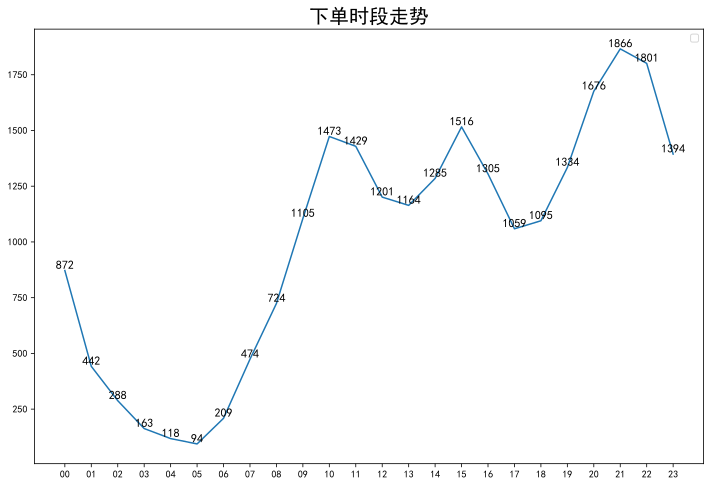

In [46]:
plt.figure(figsize=(12,8))
plt.plot(time_xd['付款时间'],time_xd['下单数量'])
for a, b in zip(time_xd['付款时间'], time_xd['下单数量']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=12)
plt.legend()
plt.title('下单时段走势',fontsize=20)
plt.show()

早上10点11点和下午的3点和晚上的8到12点是下单的高峰期，因为此时人已经下班或者正处在休息时间